<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Sharif_University_of_Technology_logo.svg" width="250" alt="cognitiveclass.ai logo"  />
</center>

# Final Proejct - Process Mining


 ## Course Info:
 
 **Course:** Business Process Management 1400-1401 <br>
 **Professor:**  Dr. Erfan Hassannayebi

## Team members:

* Sina Aghaee (99207587)
* Farzaneh Mahmoodi (99200209)
* Sahar Varchandi (99200052)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the Dataset and the Paper</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#Process_discovery">Challenge1: Process Discovery</a></li>
        <li><a href="#Customer_behaviour">Challenge2: Customer Behaviour</a></li>
        <li><a href="#BI">BI</a></li>
        <li><a href="#Prediction">Prediction</a></li>
    </ol>
</div>
<br>
<hr>

<div id="about_dataset">
    <h2>About the Dataset and the Paper</h2>
    
Our data belongs to UWV and presented in BPI 2016 Challenge.

<h3>About UWV</h3>
    
UWV (Employee Insurance Agency) is a Dutch autonomous administrative authority (ZBO) and is commissioned by the Ministry of Social Affairs and Employment (SZW) to implement employee insurances and provide labour market and data services in the Netherlands.

The Dutch employee insurances are provided for via laws such as the WW (Unemployment Insurance Act), the WIA (Work and Income according to Labour Capacity Act, which contains the IVA (Full Invalidity Benefit Regulations), WGA (Return to Work (Partially Disabled) Regulations), the Wajong (Disablement Assistance Act for Handicapped Young Persons), the WAO (Invalidity Insurance Act), the WAZ (Self-employed Persons Disablement Benefits Act), the Wazo (Work and Care Act) and the Sickness Benefits Act.

<h3>Data</h3>
    
The data in this collection pertains to customer contacts over a period of 8 months and UWV is looking for insights into their customers' journeys. The data is focused on customers in the WW (unemployment benefits) process.

Data has been collected from several different sources, namely:

1. Click data from the site www.werk.nl collected from visitors that were not logged in: 
* [BPI Challenge 2016: Clicks NOT Logged In](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Clicks_NOT_Logged_In/12708596/1)


2. Click data from the customer specific part of the site www.werk.nl (a link is made with the customer that logged in):
* [BPI Challenge 2016: Clicks Logged In](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Clicks_Logged_In/12674816/1)
 
    
3. Werkmap Message data, showing when customers contacted the UWV through a digital channel:
* [BPI Challenge 2016: Questions](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Questions/12687320/1)
    
    
4. Call data from the call center, showing when customers contacted the call center by phone:
* [BPI Challenge 2016: Werkmap Messages](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Werkmap_Messages/12714569/1)    
    
5. Complaint data showing when customers complained:
* [BPI Challenge 2016: Complaints](https://data.4tu.nl/articles/dataset/BPI_Challenge_2016_Complaints/12717647/1)

<h3>Paper</h3>
    
The Following is the paper that we chose as our base paper and we will try to analyze the data in the same way:
* [Identification of Distinct Usage Patterns and Prediction of Customer Behavior](https://www.win.tue.nl/bpi/lib/exe/fetch.php?media=2016:bpic2016_paper_1.pdf) by Sharam Dadashnia, Tim Niesen, Philip Hake, Peter Fettke, Nijat Mehdiyev and Joerg Evermann    
    
    
</div>

<div id="pre-processing">
    <h2>Pre-processing</h2>

### Reading and cleaning the data

Importing Libraries:

In [132]:
# python ######################################################################
import sys
import os
import datetime

# basics ######################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# widgets #####################################################################
import ipywidgets as widgets
from ipywidgets import interact

# process mining ##############################################################
import pm4py

# object.log
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.importer.xes import importer as xes_importer

# object.conversion
from pm4py.objects.conversion.dfg import converter as dfg_converter
from pm4py.objects.conversion.process_tree import converter as pt_converter

# algo.discovery
from pm4py.algo.discovery.alpha import variants
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

# algo.filtering
from pm4py.algo.filtering.log.auto_filter.auto_filter import apply_auto_filter

# algo.conformance
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
# vizualization
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

# statistics
from pm4py.statistics.traces.log import case_statistics

# util
from pm4py.util import vis_utils

Reading the data and saving it in a datafram:

In [5]:
clicks_logged_in = pd.read_csv('BPI2016_Clicks_Logged_In.csv', sep = ';', encoding = 'latin', parse_dates=['TIMESTAMP'] )
clicks_logged_in.shape

(7174934, 20)

There is about 7 milloin Records in clicks_logged_in dataset!!! Now let's check out a sample of records in the dataset, here is the first 10 rows:

In [6]:
clicks_logged_in.head(10)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,page_action_detail_EN,service_detail_EN,tip_EN
0,2025826,50-65,V,313,313,12956475,620841,2015-10-05 10:12:56.880,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025826,50-65,V,313,313,13243433,620841,2015-09-30 15:14:35.943,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503890,30-39,V,247,247,14805466,1690840,2015-09-01 19:35:06.707,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,NaN,3. Versturen gegevens,NaN,NaN,3. Send data,NaN
3,2063574,50-65,M,296,301,12710639,1632512,2015-11-06 10:47:42.137,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,50plus,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2185161,18-29,V,327,327,44281847,757955,2016-01-11 18:44:07.877,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/bijstan...,bijstandsuitkering,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2074173,40-49,M,296,269,32607429,1855184,2015-11-09 22:43:19.973,www.werk.nl,/werk_nl/werknemer/solliciteren/europa/land/fr...,frankrijk,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2140620,30-39,V,271,274,4752535,1723649,2015-11-02 11:39:37.567,digid.werk.nl,/werk_nl/werknemer/eintake/inschrijven,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2099262,50-65,V,330,330,388094,967997,2015-10-28 17:00:52.393,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1626445,50-65,M,330,330,12239424,1268110,2015-08-27 21:03:34.143,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/inschri...,inschrijven,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2096614,40-49,M,313,313,45886197,1916881,2016-01-19 10:44:52.140,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,aanvragen-tw,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
clicks_logged_in_SelectedColumns = clicks_logged_in[['CustomerID','SessionID', 'AgeCategory', 'Gender', 'TIMESTAMP', 'PAGE_NAME']].copy()

Chechking the types of each column:

In [9]:
clicks_logged_in_SelectedColumns.dtypes

CustomerID              int64
SessionID               int64
AgeCategory            object
Gender                 object
TIMESTAMP      datetime64[ns]
PAGE_NAME              object
dtype: object

Chechking to see if we have any NA values:

In [10]:
clicks_logged_in_SelectedColumns.isna().sum()

CustomerID     0
SessionID      0
AgeCategory    0
Gender         0
TIMESTAMP      0
PAGE_NAME      0
dtype: int64

Let's see how many activites we have in total:

In [125]:
clicks_logged_in_SelectedColumns['PAGE_NAME'].nunique()

600

We have 600 actvities!!!!

Here we export the cleand data in csv format for further analysis:

In [17]:
clicks_logged_in_SelectedColumns.to_csv ('clicks_logged_in_SelectedColumns.csv', index = False)

### Segmentation 

In this part we will segment our data in the exact same way that our chosen article has done, we we will segment our data to 6 different data set and we export all in csv format for further anlysis:

* Segment 1: Age 18-29
* Segment 2: Age 30-39
* Segment 3: Age 40-49
* Segment 4: Age 50-65
* Segment 5: Females
* Segment 6: Males


#### Segment 1: Age 18-29

In [14]:
clicks_logged_in_SelectedColumns_Age18_29 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '18-29']

In [16]:
clicks_logged_in_SelectedColumns_Age18_29.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
21,1597964,26738708,18-29,M,2015-10-06 19:26:52.197,inschrijven
23,2141794,13611302,18-29,M,2015-11-07 11:49:43.160,inschrijven
59,1050218,38542939,18-29,M,2015-12-07 21:28:55.293,gegevens
80,2042991,35485709,18-29,V,2015-11-23 16:31:39.090,vacatures_bij_mijn_cv


In [18]:
clicks_logged_in_SelectedColumns_Age18_29.to_csv ('clicks_logged_in_SelectedColumns_Age18_29.csv', index = False)

#### Segment 2: Age 30-39

In [19]:
clicks_logged_in_SelectedColumns_Age30_39 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '30-39']

In [20]:
clicks_logged_in_SelectedColumns_Age30_39.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
6,2140620,4752535,30-39,V,2015-11-02 11:39:37.567,inschrijven
20,912732,40492599,30-39,M,2015-12-21 09:33:11.770,inschrijven
26,1374280,11969296,30-39,V,2015-11-01 22:21:34.910,inschrijven
45,2060461,40872837,30-39,M,2016-01-07 15:18:52.213,vacatures_bij_mijn_cv


In [21]:
clicks_logged_in_SelectedColumns_Age30_39.to_csv ('clicks_logged_in_SelectedColumns_Age30_39.csv', index = False)

#### Segment 3: Age 40-49

In [22]:
clicks_logged_in_SelectedColumns_Age40_49 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '40-49']

In [23]:
clicks_logged_in_SelectedColumns_Age40_49.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
5,2074173,32607429,40-49,M,2015-11-09 22:43:19.973,frankrijk
9,2096614,45886197,40-49,M,2016-01-19 10:44:52.140,aanvragen-tw
14,2208978,53703958,40-49,V,2016-02-25 11:46:32.767,vacatures_bij_mijn_cv
17,2208978,53703958,40-49,V,2016-02-25 11:48:03.790,vacatures_bij_mijn_cv
22,615235,44484067,40-49,V,2016-01-10 19:33:28.140,gegevens


In [24]:
clicks_logged_in_SelectedColumns_Age40_49.to_csv ('clicks_logged_in_SelectedColumns_Age40_49.csv', index = False)

#### Segment 4: Age 50-65

In [25]:
clicks_logged_in_SelectedColumns_Age50_65 = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['AgeCategory']== '50-65']

In [26]:
clicks_logged_in_SelectedColumns_Age50_65.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
7,2099262,388094,50-65,V,2015-10-28 17:00:52.393,inschrijven
8,1626445,12239424,50-65,M,2015-08-27 21:03:34.143,inschrijven


In [27]:
clicks_logged_in_SelectedColumns_Age50_65.to_csv ('clicks_logged_in_SelectedColumns_Age50_65.csv', index = False)

#### Segment 5: Females

In [28]:
clicks_logged_in_SelectedColumns_Female = clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['Gender']== 'V']

In [29]:
clicks_logged_in_SelectedColumns_Female.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
0,2025826,12956475,50-65,V,2015-10-05 10:12:56.880,50plus
1,2025826,13243433,50-65,V,2015-09-30 15:14:35.943,50plus
2,1503890,14805466,30-39,V,2015-09-01 19:35:06.707,aanvragen-tw
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
6,2140620,4752535,30-39,V,2015-11-02 11:39:37.567,inschrijven


In [30]:
clicks_logged_in_SelectedColumns_Female.to_csv ('clicks_logged_in_SelectedColumns_Female.csv', index = False)

#### Segment 6: Males

In [31]:
clicks_logged_in_SelectedColumns_Male =  clicks_logged_in_SelectedColumns[clicks_logged_in_SelectedColumns['Gender']== 'M']

In [32]:
clicks_logged_in_SelectedColumns_Male.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
3,2063574,12710639,50-65,M,2015-11-06 10:47:42.137,50plus
5,2074173,32607429,40-49,M,2015-11-09 22:43:19.973,frankrijk
8,1626445,12239424,50-65,M,2015-08-27 21:03:34.143,inschrijven
9,2096614,45886197,40-49,M,2016-01-19 10:44:52.140,aanvragen-tw
10,1288513,52132756,50-65,M,2016-02-18 18:41:14.117,vacatures_bij_mijn_cv


In [33]:
clicks_logged_in_SelectedColumns_Male.to_csv ('clicks_logged_in_SelectedColumns_Male.csv', index = False)

### Segmentation of customer basis with respect to demographic features

Segmentation info based on Age: 

In [81]:
Segments_Comparison = {'Segment': ['Age category 18-29', 'Age category 30-39', 'Age category 40-49', 'Age category 50-65'],
                     'Number Of Sessions': [clicks_logged_in_SelectedColumns_Age18_29['SessionID'].nunique(), clicks_logged_in_SelectedColumns_Age30_39['SessionID'].nunique(), clicks_logged_in_SelectedColumns_Age40_49['SessionID'].nunique() , clicks_logged_in_SelectedColumns_Age50_65['SessionID'].nunique()] ,
                     'Number Of Customers': [clicks_logged_in_SelectedColumns_Age18_29['CustomerID'].nunique(), clicks_logged_in_SelectedColumns_Age30_39['CustomerID'].nunique(), clicks_logged_in_SelectedColumns_Age40_49['CustomerID'].nunique() , clicks_logged_in_SelectedColumns_Age50_65['CustomerID'].nunique()] ,
                     'Number of Events': [clicks_logged_in_SelectedColumns_Age18_29['SessionID'].count(), clicks_logged_in_SelectedColumns_Age30_39['SessionID'].count(), clicks_logged_in_SelectedColumns_Age40_49['SessionID'].count() , clicks_logged_in_SelectedColumns_Age50_65['SessionID'].count()],
                    }
Segments_Comparison = pd.DataFrame(data=Segments_Comparison)
Segments_Comparison = Segments_Comparison.append(Segments_Comparison[['Number Of Sessions','Number Of Customers','Number of Events' ]].sum(),ignore_index=True)
Segments_Comparison.iloc[4,0] = 'Total'

Segments_Comparison['Number Of Sessions']=Segments_Comparison['Number Of Sessions'].apply('{:,.0f}'.format)
Segments_Comparison['Number Of Customers']=Segments_Comparison['Number Of Customers'].apply('{:,.0f}'.format)
Segments_Comparison['Number of Events']=Segments_Comparison['Number of Events'].apply('{:,.0f}'.format)

Segments_Comparison


,Segment,Number Of Sessions,Number Of Customers,Number of Events
0,Age category 18-29,"105,870","7,092","1,106,045"
1,Age category 30-39,"133,356","6,420","1,432,107"
2,Age category 40-49,"158,732","5,891","1,780,253"
3,Age category 50-65,"262,548","7,244","2,856,529"
4,Total,"660,506","26,647","7,174,934"


As you can see, the numbers in the above table are precisely the same as the numbers in the following table, which is in our base paper except for the number of events which means the author of the article deleted some records, but they didn't explain which and why.

<br>

<center>
    <img src="https://user-images.githubusercontent.com/35700552/151576540-3e1ea5bf-8b6e-41eb-aae7-a9e79d944284.PNG"  />
</center>

Segmentation info based on Gender: 

In [82]:
Segments_Comparison = {'Segment': ['Female' ,'Male'],
                     'Number Of Sessions': [clicks_logged_in_SelectedColumns_Female['SessionID'].nunique() , clicks_logged_in_SelectedColumns_Male['SessionID'].nunique()] ,
                     'Number Of Customers': [ clicks_logged_in_SelectedColumns_Female['CustomerID'].nunique() , clicks_logged_in_SelectedColumns_Male['CustomerID'].nunique()] ,
                     'Number of Events': [clicks_logged_in_SelectedColumns_Female['SessionID'].count() , clicks_logged_in_SelectedColumns_Male['SessionID'].count()],
                    }
Segments_Comparison = pd.DataFrame(data=Segments_Comparison)
Segments_Comparison=Segments_Comparison.append(Segments_Comparison[['Number Of Sessions','Number Of Customers','Number of Events' ]].sum(),ignore_index=True)
Segments_Comparison.iloc[2,0] = 'Total'
Segments_Comparison['Number Of Sessions']=Segments_Comparison['Number Of Sessions'].apply('{:,.0f}'.format)
Segments_Comparison['Number Of Customers']=Segments_Comparison['Number Of Customers'].apply('{:,.0f}'.format)
Segments_Comparison['Number of Events']=Segments_Comparison['Number of Events'].apply('{:,.0f}'.format)

Segments_Comparison


,Segment,Number Of Sessions,Number Of Customers,Number of Events
0,Female,"340,384","13,038","3,704,045"
1,Male,"320,104","13,609","3,470,889"
2,Total,"660,488","26,647","7,174,934"


#### Activities frequency for all the logged_in dataset:

In the following table, you can see the most frequent activities for all logged-in customers (those with more than one percent relative frequency), as you see only 14 out of 600 hundred webpages visited in more than one percent of the time:

In [112]:
activity_counts_all_logged_in = pd.DataFrame(clicks_logged_in_SelectedColumns['PAGE_NAME'].value_counts())
activity_counts_all_logged_in['Relative Frequency(%)'] = round(activity_counts_all_logged_in['PAGE_NAME']/len(clicks_logged_in_SelectedColumns)*100,2)
activity_counts_all_logged_in.reset_index(level=0, inplace=True)
activity_counts_all_logged_in=activity_counts_all_logged_in.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })
activity_counts_all_logged_in['Absolute Frequency']=activity_counts_all_logged_in['Absolute Frequency'].apply('{:,.0f}'.format)
activity_counts_all_logged_in[activity_counts_all_logged_in['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"1,823,175",25.41
1,vacatures_bij_mijn_cv,"953,969",13.30
2,mijn_cv,"880,597",12.27
3,home,"583,545",8.13
4,vacatures_zoeken,"582,645",8.12
5,mijn_berichten,"529,311",7.38
6,aanvragen-ww,"251,063",3.50
7,mijn_werkmap,"207,776",2.90
8,mijn_sollicitaties,"203,833",2.84
9,werkmap,"181,865",2.53


Our paper only printed the table for the first segment means age between 18 to 29, so let's check out the frequency of this segment and see how close we are to what our article has done!

In [131]:
activity_counts_logged_in_18_29 = pd.DataFrame(clicks_logged_in_SelectedColumns_Age18_29['PAGE_NAME'].value_counts())
activity_counts_logged_in_18_29['Relative Frequency(%)'] = round(activity_counts_logged_in_18_29['PAGE_NAME']/len(clicks_logged_in_SelectedColumns_Age18_29)*100,2)
activity_counts_logged_in_18_29.reset_index(level=0, inplace=True)
activity_counts_logged_in_18_29=activity_counts_logged_in_18_29.rename(columns={'PAGE_NAME': 'Absolute Frequency','index': 'Activity' })
activity_counts_logged_in_18_29['Absolute Frequency']=activity_counts_logged_in_18_29['Absolute Frequency'].apply('{:,.0f}'.format)
activity_counts_logged_in_18_29[activity_counts_logged_in_18_29['Relative Frequency(%)'] >= 1]

,Activity,Absolute Frequency,Relative Frequency(%)
0,taken,"327,260",29.59
1,mijn_cv,"167,479",15.14
2,home,"84,030",7.60
3,vacatures_bij_mijn_cv,"82,818",7.49
4,mijn_berichten,"79,695",7.21
5,vacatures_zoeken,"67,415",6.10
6,aanvragen-ww,"59,514",5.38
7,inschrijven,"36,224",3.28
8,mijn_werkmap,"29,060",2.63
9,mijn_sollicitaties,"27,353",2.47


As you see in the above table, the absolute frequencies have a slight difference with the following table. We mentioned this before that the reason is the authors deleted some rows which we dont know why!! However the relative frequency we calculated is the same as the numbers in the articles table.


<br>

<center>
    <img src="https://user-images.githubusercontent.com/35700552/151576558-e9853844-0f47-40d5-9bee-d1251604b457.PNG"    />
</center>




In [166]:
most_frequent_activites_list_segment1 = activity_counts_logged_in_18_29[activity_counts_logged_in_18_29['Relative Frequency(%)'] >= 1]['Activity'].tolist()
most_frequent_activites_list_segment1

['taken',
 'mijn_cv',
 'home',
 'vacatures_bij_mijn_cv',
 'mijn_berichten',
 'vacatures_zoeken',
 'aanvragen-ww',
 'inschrijven',
 'mijn_werkmap',
 'mijn_sollicitaties',
 'mijn_documenten',
 'werkmap',
 'wijziging_doorgeven',
 'vragenlijst-uwv']

<div id="Process_discovery">
    <h2>Challenge1: Process Discovery</h2>

In [134]:
clicks_logged_in_SelectedColumns_Age18_29.head()

,CustomerID,SessionID,AgeCategory,Gender,TIMESTAMP,PAGE_NAME
4,2185161,44281847,18-29,V,2016-01-11 18:44:07.877,bijstandsuitkering
21,1597964,26738708,18-29,M,2015-10-06 19:26:52.197,inschrijven
23,2141794,13611302,18-29,M,2015-11-07 11:49:43.160,inschrijven
59,1050218,38542939,18-29,M,2015-12-07 21:28:55.293,gegevens
80,2042991,35485709,18-29,V,2015-11-23 16:31:39.090,vacatures_bij_mijn_cv


In [210]:
segment_1 = clicks_logged_in_SelectedColumns_Age18_29[['SessionID', 'PAGE_NAME', 'TIMESTAMP']].copy()
segment_1=segment_1.rename(columns={'PAGE_NAME': 'activity','SessionID': 'case_id','TIMESTAMP': 'timestamp' })
segment_1.head()


,case_id,activity,timestamp
4,44281847,bijstandsuitkering,2016-01-11 18:44:07.877
21,26738708,inschrijven,2015-10-06 19:26:52.197
23,13611302,inschrijven,2015-11-07 11:49:43.160
59,38542939,gegevens,2015-12-07 21:28:55.293
80,35485709,vacatures_bij_mijn_cv,2015-11-23 16:31:39.090


In [151]:
segment_1.shape

(1106045, 3)

In [211]:
segment_1_most_frequent = segment_1.copy()
# segment_1_most_frequent = segment_1_most_frequent[segment_1_most_frequent['activity'].isin(most_frequent_activites_list_segment1)]
segment_1_most_frequent.loc[~segment_1_most_frequent['activity'].isin(most_frequent_activites_list_segment1), 'activity'] = 'other'
segment_1_most_frequent.head()

,case_id,activity,timestamp
4,44281847,other,2016-01-11 18:44:07.877
21,26738708,inschrijven,2015-10-06 19:26:52.197
23,13611302,inschrijven,2015-11-07 11:49:43.160
59,38542939,other,2015-12-07 21:28:55.293
80,35485709,vacatures_bij_mijn_cv,2015-11-23 16:31:39.090


In [212]:
segment_1_most_frequent.shape

(1106045, 3)

In [213]:
event_log_segment_1 = pm4py.format_dataframe(
    segment_1_most_frequent,
    case_id = 'case_id',
    activity_key = 'activity',
    timestamp_key = 'timestamp', 
    timest_format = '%Y-%m-%d %H:%M:%S%z'
)

In [214]:
event_log_segment_1.head(7)

,case:concept:name,concept:name,time:timestamp,@@index
2735409,10001342,mijn_werkmap,2015-07-30 17:39:41.533,2735409
1007277,10001342,mijn_werkmap,2015-07-30 17:40:42.017,1007277
1007527,10001342,mijn_werkmap,2015-07-30 17:42:31.367,1007527
985314,10001342,taken,2015-07-30 17:42:52.037,985314
3950525,10001342,mijn_sollicitaties,2015-07-30 17:43:07.050,3950525
3326432,10001342,wijziging_doorgeven,2015-07-30 17:44:01.497,3326432
2386729,10001342,home,2015-07-30 17:46:33.343,2386729


In [215]:
start_activities = pm4py.get_start_activities(event_log_segment_1)
end_activities = pm4py.get_end_activities(event_log_segment_1)

In [220]:
print(f'Start activities: {start_activities}')
print(f'\nEnd activities  : {end_activities}')

Start activities: {'home': 30765, 'taken': 24096, 'werkmap': 14378, 'mijn_berichten': 12061, 'other': 7352, 'mijn_werkmap': 3853, 'mijn_cv': 2975, 'wijziging_doorgeven': 2417, 'vacatures_bij_mijn_cv': 1954, 'mijn_sollicitaties': 1755, 'mijn_documenten': 1609, 'vacatures_zoeken': 874, 'aanvragen-ww': 858, 'inschrijven': 637, 'vragenlijst-uwv': 286}

End activities  : {'home': 32232, 'taken': 28967, 'mijn_berichten': 11949, 'other': 7333, 'vacatures_bij_mijn_cv': 5139, 'wijziging_doorgeven': 4210, 'mijn_cv': 3185, 'mijn_werkmap': 3154, 'mijn_sollicitaties': 2779, 'vacatures_zoeken': 2776, 'mijn_documenten': 2202, 'aanvragen-ww': 707, 'inschrijven': 540, 'werkmap': 464, 'vragenlijst-uwv': 233}


In [221]:
xes_exporter.apply(event_log_segment_1, 'event_log_segment_1.xes')

exporting log, completed traces ::   0%|          | 0/105870 [00:00<?, ?it/s]

In [222]:
log_segment_1 = xes_importer.apply('event_log_segment_1.xes')

parsing log, completed traces ::   0%|          | 0/105870 [00:00<?, ?it/s]

In [223]:
# EventLog
type(log_segment_1)

pm4py.objects.log.obj.EventLog

In [224]:
# Trace
type(log_segment_1[0])

pm4py.objects.log.obj.Trace

In [225]:
# Event
type(log_segment_1[0][0])

pm4py.objects.log.obj.Event

In [226]:
# concept:name (i.e case_id) for each trace
[trace.attributes['concept:name'] for trace in log_segment_1]

['10001342',
 '10002959',
 '10003020',
 '1000323',
 '10003355',
 '10003732',
 '10004363',
 '10004790',
 '10005199',
 '10005229',
 '10005282',
 '10005388',
 '10006232',
 '10008473',
 '1001026',
 '10013809',
 '10013970',
 '10014505',
 '10014979',
 '10018582',
 '1001881',
 '10018864',
 '10018915',
 '10018936',
 '10019324',
 '10019398',
 '10019537',
 '10020597',
 '1002200',
 '10022411',
 '10022869',
 '10022913',
 '10024251',
 '10025702',
 '10025955',
 '10026944',
 '1002984',
 '10030339',
 '10030591',
 '10031056',
 '10031236',
 '10032004',
 '10032012',
 '10032043',
 '1003596',
 '10036758',
 '10036787',
 '1003679',
 '10039982',
 '10040114',
 '10040167',
 '10041943',
 '10042083',
 '1004219',
 '10042472',
 '10043007',
 '10043144',
 '10043283',
 '10043581',
 '10043989',
 '10044069',
 '10044070',
 '1004457',
 '10048325',
 '10048783',
 '10049745',
 '10051809',
 '10051933',
 '1005278',
 '10053705',
 '10053846',
 '10054548',
 '10054786',
 '10055231',
 '10055448',
 '10056894',
 '10057406',
 '1005826

In [227]:
# Start activities
pm4py.get_start_activities(log_segment_1)

{'mijn_werkmap': 3853,
 'werkmap': 14378,
 'home': 30765,
 'taken': 24096,
 'other': 7352,
 'mijn_berichten': 12061,
 'wijziging_doorgeven': 2417,
 'inschrijven': 637,
 'mijn_cv': 2975,
 'mijn_documenten': 1609,
 'vacatures_bij_mijn_cv': 1954,
 'mijn_sollicitaties': 1755,
 'aanvragen-ww': 858,
 'vragenlijst-uwv': 286,
 'vacatures_zoeken': 874}

In [228]:
# End activities
pm4py.get_end_activities(log_segment_1)

{'home': 32232,
 'mijn_berichten': 11949,
 'taken': 28967,
 'wijziging_doorgeven': 4210,
 'mijn_werkmap': 3154,
 'mijn_documenten': 2202,
 'aanvragen-ww': 707,
 'mijn_sollicitaties': 2779,
 'vacatures_bij_mijn_cv': 5139,
 'vacatures_zoeken': 2776,
 'other': 7333,
 'werkmap': 464,
 'mijn_cv': 3185,
 'inschrijven': 540,
 'vragenlijst-uwv': 233}

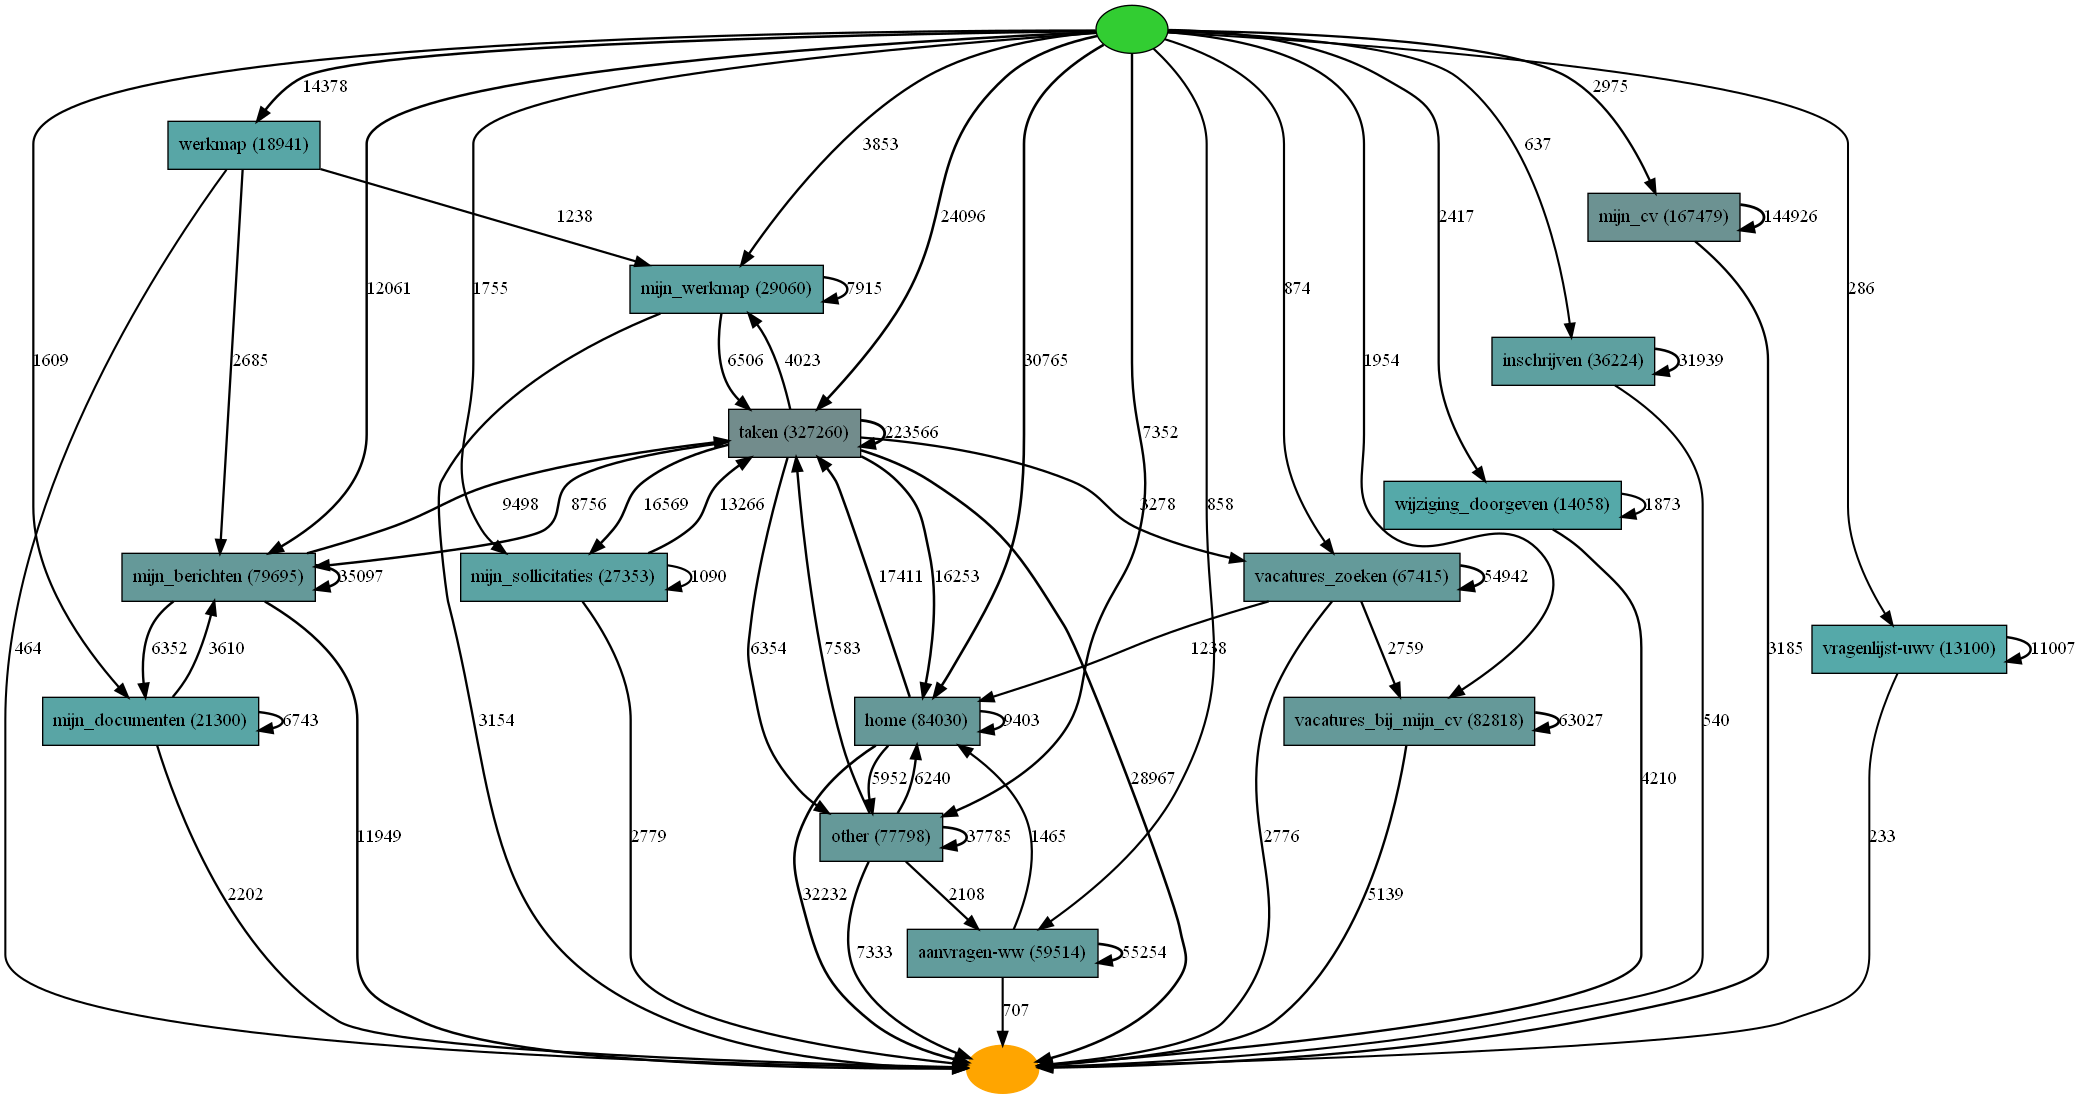

In [258]:
# Simplified Interface
heu_net = pm4py.discover_heuristics_net(
    log_segment_1, dependency_threshold=0.999, 
    and_threshold=0.999, 
    loop_two_threshold=0.999
)
pm4py.save_vis_heuristics_net(heu_net, file_path='heuristics_net.png') 
pm4py.view_heuristics_net(heu_net)

In [241]:
def heuristics_tree(dependency_threshold, and_threshold, loop_two_threshold):
    # Parameters
    parameters = heuristics_miner.Variants.CLASSIC.value.Parameters

    # Miner
    heu_net = heuristics_miner.apply_heu(
        log_segment_1,
        variant=heuristics_miner.Variants.CLASSIC, 
        parameters={
            parameters.DEPENDENCY_THRESH: dependency_threshold, 
            parameters.AND_MEASURE_THRESH: and_threshold,
            parameters.LOOP_LENGTH_TWO_THRESH: loop_two_threshold
        }
    )

    # GraphViz
    gviz = hn_visualizer.apply(heu_net)
    
    # Save
    hn_visualizer.save(gviz, 'temp.png')
    
    # View
    vis_utils.view_image_in_jupyter('temp.png')


interact(
    heuristics_tree, 
    dependency_threshold = widgets.FloatSlider(
        value=0.5, min=0, max=1, step=0.01, description='Dependency:', 
        disabled=False, continuous_update=False, orientation='horizontal', 
        readout=True, readout_format='.2f'
    ),
    and_threshold = widgets.FloatSlider(
        value=0.65, min=0, max=1, step=0.01, description='And:', 
        disabled=False, continuous_update=False, orientation='horizontal', 
        readout=True, readout_format='.2f'
    ),
    loop_two_threshold = widgets.FloatSlider(
        value=0.5, min=0, max=1, step=0.01, description='Loop Two:', 
        disabled=False, continuous_update=False, orientation='horizontal', 
        readout=True, readout_format='.2f'
    ),
)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Dependency:', max=1.0, step…

<function __main__.heuristics_tree(dependency_threshold, and_threshold, loop_two_threshold)>

<div id="Customer_behaviour">
    <h2>Challenge2: Customer Behaviour</h2>

